<a href="https://colab.research.google.com/github/Hanifanta/Topic-Modeling-LDA/blob/main/Topic_Modeling_with_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**

Membuat sebuah machine learning Topic modeling menggunakan algoritma Latent Dirichlet Allocation (LDA) 


Dataset : https://www.kaggle.com/datasets/therohk/million-headlines

## **Download dataset**

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d therohk/million-headlines

In [ ]:
!unzip /content/million-headlines.zip

## **Import Library**

In [ ]:
# data visualisasi dan manipulasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

# preprocessing
from nltk.corpus import stopwords  # stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# named entity recognition (NER)
from nltk import ne_chunk

# vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## **Load dataset**

In [ ]:
# mengubah data csv menjadi dataframe
df = pd.read_csv('/content/abcnews-date-text.csv')

## **Exploratory Data Analysis**



In [ ]:
# menampilkan 10 data dari dataset
df.head(10)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp


In [ ]:
# menampilkan jumlah baris dan kolom pada dataset
print('Jumlah baris dan kolom pada dataset :', df.shape)

Jumlah baris dan kolom pada dataset : (1244184, 2)


In [ ]:
# melihat tipe data pada kolom
df.dtypes

publish_date      int64
headline_text    object
dtype: object

In [ ]:
# menghapus kolom pada dataset yang tidak digunakan
df.drop(['publish_date'],axis=1,inplace=True)

In [ ]:
# melihat hasil dari drop kolom
df.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


### **Data Cleaning and Preprocessing**

In [ ]:
# membersihkan data text pada dataset menggunakan WordNetLemmatizer
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [ ]:
# menerapkan hasil clean_text ke semua data dan menambah kolom 'headline_cleaned_text'
df['headline_cleaned_text']=df['headline_text'].apply(clean_text)

In [ ]:
# melihat hasil dari clean_text
df.head()

,headline_text,headline_cleaned_text
0,aba decides against community broadcasting lic...,decides community broadcasting licence
1,act fire witnesses must be aware of defamation,fire witness must aware defamation
2,a g calls for infrastructure protection summit,call infrastructure protection summit
3,air nz staff in aust strike for pay rise,staff aust strike rise
4,air nz strike to affect australian travellers,strike affect australian traveller


Terlihat bahwa terjadi perubahan seperti contoh text "act" dihilangkan. dan kata yang tidak lengkap dihilangkan.

In [ ]:
# menghapus kolom 'headline_text' karena sudah tidak terpakai
df.drop(['headline_text'],axis=1,inplace=True)

In [ ]:
# menampilkan hasil drop kolom
df.head()

,headline_cleaned_text
0,decides community broadcasting licence
1,fire witness must aware defamation
2,call infrastructure protection summit
3,staff aust strike rise
4,strike affect australian traveller


In [ ]:
# melihat data text yang berada pada baris ke 3740
df['headline_cleaned_text'][3740]

'teacher threaten industrial action regional'

### **Extracting the features and creating the document-term-matrix**

Untuk melakukan ekstrak feature dan membuat Document-Term-Matrix(DTM), saya menggunakan library TFIDF.

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # untuk min_df,max_df,max_features, dan lain lain.

In [ ]:
# melakukan transform pada kolom 'headline_cleaned_text'
vect_text=vect.fit_transform(df['headline_cleaned_text'])

In [ ]:
# menampilkan hasil dari transform pada kolom 'headline_cleaned_text'
print(vect_text.shape)
print(vect_text)

(1244184, 1000)
  (0, 507)	0.7835866365343614
  (0, 179)	0.6212825307738553
  (1, 575)	0.6349880865942004
  (1, 982)	0.6342927179400741
  (1, 322)	0.4409794528678519
  (2, 849)	0.6547639702280009
  (2, 680)	0.6238273694257671
  (2, 123)	0.4267593659740731
  (3, 742)	0.4532976215030844
  (3, 841)	0.4902042737088293
  (3, 55)	0.5231144394497186
  (3, 825)	0.5296907773564236
  (4, 57)	0.6353226814247142
  (4, 841)	0.7722467808073474
  (5, 977)	1.0
  (6, 708)	1.0
  (7, 542)	0.5181893045688648
  (7, 345)	0.47999299809054896
  (7, 960)	0.536081350460646
  (7, 54)	0.4622805988820778
  (8, 452)	0.42971935152299656
  (8, 201)	0.35008746491576936
  (8, 774)	0.4480146252705608
  (8, 12)	0.5211813266275572
  (8, 55)	0.469502892593777
  :	:
  (1244176, 523)	0.7819690365488077
  (1244176, 62)	0.6233172754536243
  (1244177, 994)	0.6308823897546781
  (1244177, 659)	0.7758784765009443
  (1244178, 174)	0.6039082400840834
  (1244178, 60)	0.6158398551561406
  (1244178, 373)	0.5060001090511829
  (1244179, 

Penjelasan diatas adalah jika nilai Tfidf pada sebuah data bernilai kecil maka kata tersebut sering muncul atau termasuk kata umum yang sering digunakan.

In [ ]:
idf=vect.idf_

In [ ]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['money'])
print(dd['bank'])

police walk
7.273524225837403
6.631535741105009


Kita dapat melihat bahwa berdasarkan nilai idf, 'bank' adalah kata yang paling sering muncul, sementara 'money' paling jarang muncul di antara berita-berita tersebut.

## **Modeling**

Latent Dirichlet Allocation (LDA) adalah teknik yang paling populer, topik-topik tersebut kemudian menghasilkan kata-kata berdasarkan distribusi probabilitasnya.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) # n_components adalah jumlah dari topik

In [ ]:
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(1244184, 10)
[[0.0415823  0.0415823  0.0415823  ... 0.0415823  0.62575927 0.0415823 ]
 [0.19959635 0.03690472 0.03689683 ... 0.03689683 0.03689683 0.03689683]
 [0.03696378 0.03696378 0.19471019 ... 0.03696378 0.50957953 0.03696378]
 ...
 [0.04142418 0.33877314 0.04142418 ... 0.04142418 0.04142418 0.04142418]
 [0.04151834 0.04151834 0.04151834 ... 0.04151834 0.36011814 0.04151834]
 [0.20265722 0.03334462 0.03334462 ... 0.03334462 0.03334462 0.03334462]]


In [ ]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0


In [ ]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  4.158230366964279 %
Topic  1 :  4.158230366976006 %
Topic  2 :  4.158230366969732 %
Topic  3 :  4.1582303669724 %
Topic  4 :  4.1582303669721075 %
Topic  5 :  4.1582303669718925 %
Topic  6 :  4.158230366967037 %
Topic  7 :  4.158230366968324 %
Topic  8 :  62.5759266972693 %
Topic  9 :  4.158230366968913 %


In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[1.00001363e-01 1.00000749e-01 1.01861138e+03 ... 1.00010968e-01
  1.00004927e-01 1.00006924e-01]
 [1.00002223e-01 1.00001176e-01 1.00000832e-01 ... 1.00008798e-01
  1.00001420e-01 1.00005772e-01]
 [1.00000381e-01 1.00000777e-01 1.00001103e-01 ... 1.00006172e-01
  1.00001393e-01 1.00004973e-01]
 ...
 [1.00001183e-01 1.00001474e-01 1.00001614e-01 ... 1.00004791e-01
  1.00001709e-01 1.00004789e-01]
 [1.00000184e-01 5.31736977e+02 1.00001697e-01 ... 2.87310871e+03
  2.07560446e+02 1.00005909e-01]
 [1.00000380e-01 1.00001909e-01 1.00001589e-01 ... 1.00006382e-01
  1.00002813e-01 1.00002584e-01]]
(10, 1000)


In [ ]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
coronavirus covid case fire brisbane could house crash hotel street 

Topic 1: 
police victoria restriction open bushfire island premier water finance storm 

Topic 2: 
australia queensland call health indigenous north farmer student labor high 

Topic 3: 
say home change coast canberra worker former gold tasmanian three 

Topic 4: 
sydney woman government border first live help speaks regional climate 

Topic 5: 
election record south family tasmania school death found dead president 

Topic 6: 
donald court child adelaide victorian show national perth federal report 

Topic 7: 
australian trump year china news minister back trial charged andrew 

Topic 8: 
melbourne people community time final royal rise story commission game 

Topic 9: 
vaccine world state life market morrison business attack scott test 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## **Evaluation**

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

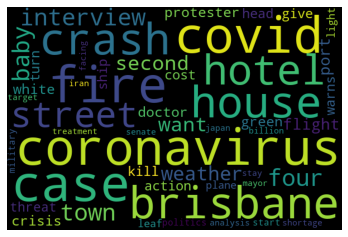

In [ ]:
# topic 0
draw_word_cloud(0)

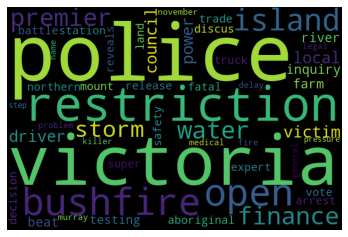

In [ ]:
# topic 1
draw_word_cloud(1)